In [1]:
import torch
import os
import torchvision

In [2]:
in_dir = './rawdata/Images'
new_dir = './data/all'

In [ ]:
for subdir in os.listdir(path=in_dir):
    path = os.path.join(in_dir, subdir)
    breed = subdir[10:]
    imgs = os.listdir(path=path)
    i = 0
    for img in imgs:
        old_name = os.path.join(path, img)
        filename = breed + '_' +str(i) + '.jpg'
        new_name = os.path.join(new_dir, filename)
        os.rename(old_name, new_name)
        i += 1

In [18]:
for img in os.listdir(path=new_dir):
    dir_name = img[:5]
    if not os.path.isdir(dir_name):
        os.makedirs(dir_name)
    old_name = os.path.join(new_dir, img)
    filename = dir_name + '/' + img
    new_name = os.path.join(new_dir, filename)
    os.rename(old_name, new_name)

affenpinscher
True
True
./data/all\affenpinscher_0.jpg
./data/all\affenpinscher/affenpinscher_0.jpg


In [4]:
import torchvision.transforms as transforms

In [5]:
transform = transforms.Compose([transforms.Resize(128), transforms.CenterCrop(128),transforms.ToTensor(),])
data = torchvision.datasets.ImageFolder(in_dir, transform=transform)
generator = torch.Generator().manual_seed(42)
split = torch.utils.data.random_split(data, [0.95, 0.05], generator=generator)
train_data = split[0]
val_data = split[1]

print(train_data.__len__())
print(val_data.__len__())

train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=32)
val_loader = torch.utils.data.DataLoader(val_data, shuffle=True, batch_size=32)

19551
1029


In [6]:
torch.save(train_loader, './generator/dataloaders/trainloader.th')

In [7]:
torch.save(val_loader, './generator/dataloaders/valloader.th')

In [6]:
imgs, label = next(iter(train_loader))
print(label)

tensor([ 43,  61, 118,  78,  36,   2,  65,  33,  55,  94,  75,   1,  93,  61,
        105,   6,  23,  77,  50,  27,  50,  38,  26,  96,  69,  90,  37,  38,
         93,  95,  74,  73])


In [40]:
imgs, label = next(iter(train_loader))
imgs = imgs.numpy().transpose(0, 2, 3, 1)

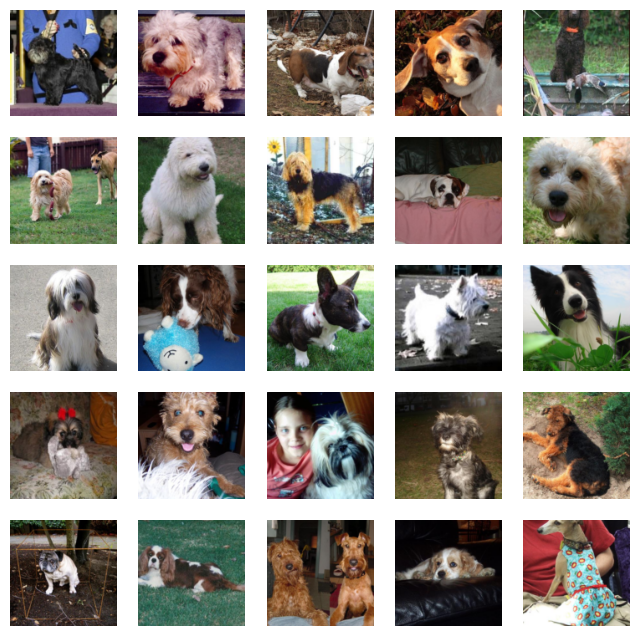

In [41]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(5,5, figsize = (8,8))

for i in range(5):
    for j in range(5):
        axs[i,j].imshow(imgs[5*i+j])
        axs[i,j].axis('off')

plt.show()

In [5]:
from PIL import Image
filenames = os.listdir(new_dir)
sizes = []
for f in filenames:
    ff = os.path.join(new_dir, f)
    sizes.append(Image.open(ff, 'r').size)
# sizes = [Image.open(f, 'r').size for f in filenames]
max(sizes)

(3264, 2448)

In [6]:
min(sizes)

(97, 134)